# Query National Park Service Boundaries

a. stein 1.18.22

This notebook explores how to (and does) query data from the national park service (NPS) for geodata.

In [9]:
%pylab inline

import urllib.parse
import urllib.request

import geojson
import geopandas as gpd

Populating the interactive namespace from numpy and matplotlib


Following this site: https://support.esri.com/en/technical-article/000019645    
We need to deviate with this: https://stackoverflow.com/questions/44049679/geojson-to-shapefile-using-python

Following is a combination to get it to work

In [2]:
# url that points to the nps boundary query page
url = 'https://services1.arcgis.com/fBc8EJBxQRMcHlei/arcgis/rest/services/+NPS_Land_Resources_Division_Boundary_and_Tract_Data_Service/FeatureServer/2/query'

In [3]:
# this is taken from the first hyperlink
# For Python 3
params = {'where': '1=1',
		   'geometryType': 'esriGeometryEnvelope',
		   'spatialRel': 'esriSpatialRelIntersects',
		   'relationParam': '',
		   'outFields': '*',
		   'returnGeometry': 'true',
		   'geometryPrecision':'',
		   'outSR': '',
		   'returnIdsOnly': 'false',
		   'returnCountOnly': 'false',
		   'orderByFields': '',
		   'groupByFieldsForStatistics': '',
		   'returnZ': 'false',
		   'returnM': 'false',
		   'returnDistinctValues': 'false',
		   'f': 'geojson',
		   }

encode_params = urllib.parse.urlencode(params).encode("utf-8")

In [4]:
# getting url request error
response = urllib.request.urlopen(url, encode_params)

HTTPError: HTTP Error 404: Not Found

In [ ]:
data = geojson.loads(response.read())

In [ ]:
with open('../data/nps_bounds.geojson', 'w') as f:
    geojson.dump(data,f)

In [ ]:
?geojson.dump

Signature:
geojson.dump(
    obj,
    fp,
    cls=<class 'geojson.codec.GeoJSONEncoder'>,
    allow_nan=False,
    **kwargs,
)
Docstring: <no docstring>
File:      /pool0/data/steinadi/.conda/envs/sedi/lib/python3.7/site-packages/geojson/codec.py
Type:      function


In [ ]:
# using geojson files seems to be just fine, so let's do that instead of clunky shapefiles

gdf = gpd.read_file('../data/nps_bounds.geojson')
gdf

,OBJECTID,UNIT_CODE,GIS_Notes,UNIT_NAME,DATE_EDIT,STATE,REGION,GNIS_ID,UNIT_TYPE,CREATED_BY,METADATA,PARKNAME,CreationDate,Creator,EditDate,Editor,GlobalID,Shape__Area,Shape__Length,geometry
0,1,APPA,Lands - http://landsnet.nps.gov/tractsnet/docu...,Appalachian National Scenic Trail,1638835200000,ME,NE,2766084,National Scenic Trail,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Appalachian,1641465825000,WASO,1641465825000,WASO,3923bec4-1652-41ca-a444-84fead65aba5,1.483097e+09,5.738046e+06,"MULTIPOLYGON (((-84.23454 34.62248, -84.23439 ..."
1,2,WHHO,Lands - http://landsnet.nps.gov/tractsnet/docu...,White House,1275004800000,DC,NC,2733430,Other Designation,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,President's Park (White House),1641465875000,WASO,1641465875000,WASO,c1455489-c4ea-40e8-b063-187c68391fac,1.227879e+05,1.366089e+03,"POLYGON ((-77.03526 38.89634, -77.03526 38.896..."
2,3,BRCR,Lands - http://landsnet.nps.gov/tractsnet/docu...,Brices Cross Roads National Battlefield Site,1129161600000,MS,SE,667556,National Battlefield Site,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Brices Cross Roads,1641465745000,WASO,1641465745000,WASO,338b4ffd-b37e-4062-9983-6419939ef145,5.930141e+03,3.421651e+02,"POLYGON ((-88.72947 34.50599, -88.72860 34.506..."
3,4,MANZ,Lands - http://landsnet.nps.gov/tractsnet/docu...,Manzanar National Historic Site,1204588800000,CA,PW,1804731,National Historic Site,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Manzanar,1641465864000,WASO,1641465864000,WASO,88da484b-186e-4cc7-bfb0-68fed2fb61ed,5.134513e+06,8.941593e+03,"POLYGON ((-118.15405 36.71756, -118.15515 36.7..."
4,5,DRTO,Lands - http://landsnet.nps.gov/tractsnet/docu...,Dry Tortugas National Park,1194393600000,FL,SE,307632,National Park,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Dry Tortugas,1641465753000,WASO,1641465753000,WASO,b7d7dc12-29e6-4669-a9ed-448983b3f478,3.226821e+08,6.974401e+04,"MULTIPOLYGON (((-82.77445 24.70843, -82.76523 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,423,ISRO,PRELIMINARY - Data has not completed the entir...,Isle Royale National Park,1387324800000,MI,MW,1616980,National Park,Lands,Preliminary data. Contact the Land Resources P...,Isle Royale,1578608163000,SCarlton@nps.gov_nps,1578608163000,SCarlton@nps.gov_nps,5e63c781-e9aa-4390-a47b-dc1b451240bc,4.985802e+09,3.461377e+05,"MULTIPOLYGON (((-88.56271 47.12219, -88.56304 ..."
423,424,DELA,PRELIMINARY - Data has not completed the entir...,Delaware National Scenic River,1539734400000,PA,NE,need,National Scenic River,Lands,Preliminary data. Contact the Land Resources P...,Delaware,1578608163000,SCarlton@nps.gov_nps,1578608163000,SCarlton@nps.gov_nps,06a4d82a-43d7-4685-bf1f-7792459fd203,1.997406e+07,2.421450e+05,"POLYGON ((-74.75803 41.34187, -74.75839 41.341..."
424,425,HART,PRELIMINARY - Data has not completed the entir...,Harriet Tubman National Historical Park,1553126400000,NY,NE,need,National Historical Park,Lands,Preliminary data. Contact the Land Resources P...,Harriet Tubman,1578608163000,SCarlton@nps.gov_nps,1578608163000,SCarlton@nps.gov_nps,0860bc94-332d-4add-b733-8f9d065a40af,2.563835e+05,2.544291e+03,"MULTIPOLYGON (((-76.55819 42.91144, -76.55805 ..."
425,426,MNRR,Lands - http://landsnet.nps.gov/tractsnet/docu...,Missouri National Recreation River,1578614400000,SD,MW,2733411,National Recreation River,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Missouri,1585972697000,RJohnson@nps.gov_nps,1585972697000,RJohnson@nps.gov_nps,826e39a9-cbd7-4c37-af91-1c4a6f6d684b,5.140014e+08,6.375951e+05,"MULTIPOLYGON (((-97.29310 42.87327, -97.29197 ..."


In [ ]:
gdf[gdf.STATE == 'WA']

,OBJECTID,UNIT_CODE,GIS_Notes,UNIT_NAME,DATE_EDIT,STATE,REGION,GNIS_ID,UNIT_TYPE,CREATED_BY,METADATA,PARKNAME,CreationDate,Creator,EditDate,Editor,GlobalID,Shape__Area,Shape__Length,geometry
17,18,LACH,Lands - http://landsnet.nps.gov/tractsnet/docu...,Lake Chelan National Recreation Area,1623628800000,WA,PW,1528425,National Recreation Area,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Lake Chelan,1641465862000,WASO,1641465862000,WASO,fbb48ff0-6586-4c58-b4f3-1d71bb4212fe,5.760042e+08,1.364468e+05,"POLYGON ((-120.62256 48.26911, -120.63218 48.2..."
49,50,MIIN,Lands - http://landsnet.nps.gov/tractsnet/docu...,Minidoka National Historic Site,1444867200000,WA,PW,2766708,National Historic Site,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Minidoka,1641465864000,WASO,1641465864000,WASO,3d275170-90d1-44fe-bac5-cdab70c70345,2.998805e+06,1.206120e+04,"MULTIPOLYGON (((-114.25225 42.67831, -114.2528..."
87,88,NOCA,Lands - http://landsnet.nps.gov/tractsnet/docu...,North Cascades National Park,1474848000000,WA,PW,1528421,National Park,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,North Cascades,1641465865000,WASO,1641465865000,WASO,f8fee043-cd94-444f-85bb-bccad4e04dcf,4.656136e+09,5.359118e+05,"MULTIPOLYGON (((-121.06308 48.45964, -121.0632..."
93,94,ROLA,Lands - http://landsnet.nps.gov/tractsnet/docu...,Ross Lake National Recreation Area,1516233600000,WA,PW,1528419,National Recreation Area,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Ross Lake,1641465867000,WASO,1641465867000,WASO,644bac60-adc0-4b60-b233-5b99e18aa63e,1.087618e+09,2.689396e+05,"POLYGON ((-121.38888 48.58176, -121.38952 48.5..."
202,203,MORA,Lands - http://landsnet.nps.gov/tractsnet/docu...,Mount Rainier National Park,1447718400000,WA,PW,1528416,National Park,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Mount Rainier,1641465865000,WASO,1641465865000,WASO,99e54d17-7e45-4d60-92a0-c16d312534ea,2.045641e+09,2.176600e+05,"MULTIPOLYGON (((-122.12686 46.75926, -122.1242..."
246,247,FOVA,Lands - http://landsnet.nps.gov/tractsnet/docu...,Fort Vancouver National Historic Site,1299110400000,WA,PW,1504974,National Historic Site,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Fort Vancouver,1641465769000,WASO,1641465769000,WASO,a69b373d-7809-48fc-ac82-b43d4fa5f456,1.723305e+06,1.176582e+04,"MULTIPOLYGON (((-122.66901 45.62006, -122.6690..."
306,307,WHMI,Lands - http://landsnet.nps.gov/tractsnet/docu...,Whitman Mission National Historic Site,1319673600000,WA,PW,1531185,National Historic Site,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Whitman Mission,1641465876000,WASO,1641465876000,WASO,a56c8a50-4f89-43a2-a3f9-14fb9c2f4896,1.165191e+06,6.356421e+03,"POLYGON ((-118.46524 46.04075, -118.47091 46.0..."
397,398,OLYM,PRELIMINARY - Data has not completed the entir...,Olympic National Park,1429660800000,WA,PW,1530459,National Park,Lands,Preliminary data. Contact the Land Resources P...,Olympic,1578608163000,SCarlton@nps.gov_nps,1578608163000,SCarlton@nps.gov_nps,d568927b-56f4-4f49-a52a-b8ab9f7676a3,8.203591e+09,1.158605e+06,"MULTIPOLYGON (((-124.38063 47.60211, -124.3807..."
400,401,SAJH,PRELIMINARY - Data has not completed the entir...,San Juan Island National Historical Park,1437696000000,WA,PW,1534055,National Historical Park,Lands,Preliminary data. Contact the Land Resources P...,San Juan Island,1578608163000,SCarlton@nps.gov_nps,1578608163000,SCarlton@nps.gov_nps,885ae402-ab5a-48d1-91bd-4114a8abc323,1.960832e+07,4.016415e+04,"MULTIPOLYGON (((-123.00504 48.46942, -123.0049..."
408,409,LEWI,PRELIMINARY - Data has not completed the entir...,Lewis and Clark National Historical Park,1568073600000,WA,PW,2055170,National Historical Park,Lands,Preliminary data. Contact the Land Resources P...,Lewis and Clark,1578608163000,SCarlton@nps.gov_nps,1578608163000,SCarlton@nps.gov_nps,6ceaf8b1-2e9e-47a5-8538-c9909ec055a3,3.065070e+07,7.983376e+04,"MULTIPOLYGON (((-123.93157 45.98449, -123.9316..."


In [ ]:
gdf[(gdf.STATE == 'WA') | (gdf.STATE == 'OR')]

,OBJECTID,UNIT_CODE,GIS_Notes,UNIT_NAME,DATE_EDIT,STATE,REGION,GNIS_ID,UNIT_TYPE,CREATED_BY,METADATA,PARKNAME,CreationDate,Creator,EditDate,Editor,GlobalID,Shape__Area,Shape__Length,geometry
17,18,LACH,Lands - http://landsnet.nps.gov/tractsnet/docu...,Lake Chelan National Recreation Area,1623628800000,WA,PW,1528425,National Recreation Area,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Lake Chelan,1641465862000,WASO,1641465862000,WASO,fbb48ff0-6586-4c58-b4f3-1d71bb4212fe,5.760042e+08,1.364468e+05,"POLYGON ((-120.62256 48.26911, -120.63218 48.2..."
20,21,JODA,Lands - http://landsnet.nps.gov/tractsnet/docu...,John Day Fossil Beds National Monument,1436313600000,OR,PW,1133439,National Monument,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,John Day Fossil Beds,1641465894000,WASO,1641465894000,WASO,6a8d9167-6eed-4acd-9055-7cb1311049e0,1.170267e+08,1.178536e+05,"MULTIPOLYGON (((-119.63853 44.49838, -119.6436..."
49,50,MIIN,Lands - http://landsnet.nps.gov/tractsnet/docu...,Minidoka National Historic Site,1444867200000,WA,PW,2766708,National Historic Site,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Minidoka,1641465864000,WASO,1641465864000,WASO,3d275170-90d1-44fe-bac5-cdab70c70345,2.998805e+06,1.206120e+04,"MULTIPOLYGON (((-114.25225 42.67831, -114.2528..."
80,81,CRLA,Lands - http://landsnet.nps.gov/tractsnet/docu...,Crater Lake National Park,1496620800000,OR,PW,1163670,National Park,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Crater Lake,1641465752000,WASO,1641465752000,WASO,a804733f-87a4-4e56-95f5-84e51179e5e0,1.382854e+09,1.754375e+05,"MULTIPOLYGON (((-122.88278 42.33695, -122.8828..."
82,83,ORCA,Lands - http://landsnet.nps.gov/tractsnet/docu...,Oregon Caves National Monument and Preserve,1623628800000,OR,PW,1147260,National Monument,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Oregon Caves,1641465866000,WASO,1641465866000,WASO,8a5f44ae-5110-437c-a46e-f3e3efc23e70,3.333237e+07,2.847476e+04,"MULTIPOLYGON (((-123.64524 42.16207, -123.6452..."
87,88,NOCA,Lands - http://landsnet.nps.gov/tractsnet/docu...,North Cascades National Park,1474848000000,WA,PW,1528421,National Park,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,North Cascades,1641465865000,WASO,1641465865000,WASO,f8fee043-cd94-444f-85bb-bccad4e04dcf,4.656136e+09,5.359118e+05,"MULTIPOLYGON (((-121.06308 48.45964, -121.0632..."
93,94,ROLA,Lands - http://landsnet.nps.gov/tractsnet/docu...,Ross Lake National Recreation Area,1516233600000,WA,PW,1528419,National Recreation Area,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Ross Lake,1641465867000,WASO,1641465867000,WASO,644bac60-adc0-4b60-b233-5b99e18aa63e,1.087618e+09,2.689396e+05,"POLYGON ((-121.38888 48.58176, -121.38952 48.5..."
202,203,MORA,Lands - http://landsnet.nps.gov/tractsnet/docu...,Mount Rainier National Park,1447718400000,WA,PW,1528416,National Park,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Mount Rainier,1641465865000,WASO,1641465865000,WASO,99e54d17-7e45-4d60-92a0-c16d312534ea,2.045641e+09,2.176600e+05,"MULTIPOLYGON (((-122.12686 46.75926, -122.1242..."
246,247,FOVA,Lands - http://landsnet.nps.gov/tractsnet/docu...,Fort Vancouver National Historic Site,1299110400000,WA,PW,1504974,National Historic Site,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Fort Vancouver,1641465769000,WASO,1641465769000,WASO,a69b373d-7809-48fc-ac82-b43d4fa5f456,1.723305e+06,1.176582e+04,"MULTIPOLYGON (((-122.66901 45.62006, -122.6690..."
306,307,WHMI,Lands - http://landsnet.nps.gov/tractsnet/docu...,Whitman Mission National Historic Site,1319673600000,WA,PW,1531185,National Historic Site,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Whitman Mission,1641465876000,WASO,1641465876000,WASO,a56c8a50-4f89-43a2-a3f9-14fb9c2f4896,1.165191e+06,6.356421e+03,"POLYGON ((-118.46524 46.04075, -118.47091 46.0..."


In [ ]:
path = '../data/pw_nps_bounds.geojson'

try:
    os.remove(path)
except:
    pass

gdf[gdf.REGION == 'PW'].to_file(path)

In [2]:
pnw_nps_gpd = gpd.read_file('../data/pw_nps_bounds.geojson')
pnw_nps_gpd.head()

,OBJECTID,UNIT_CODE,GIS_Notes,UNIT_NAME,DATE_EDIT,STATE,REGION,GNIS_ID,UNIT_TYPE,CREATED_BY,METADATA,PARKNAME,CreationDate,Creator,EditDate,Editor,GlobalID,Shape__Area,Shape__Length,geometry
0,4,MANZ,Lands - http://landsnet.nps.gov/tractsnet/docu...,Manzanar National Historic Site,1204588800000,CA,PW,1804731,National Historic Site,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Manzanar,1641465864000,WASO,1641465864000,WASO,88da484b-186e-4cc7-bfb0-68fed2fb61ed,5.134513e+06,8941.593062,"POLYGON ((-118.15405 36.71756, -118.15515 36.7..."
1,8,MUWO,Lands - http://landsnet.nps.gov/tractsnet/docu...,Muir Woods National Monument,1568851200000,CA,PW,229295,National Monument,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Muir Woods,1641465911000,WASO,1641465911000,WASO,8d63f7eb-43ae-44d8-90fd-01379b6f6097,3.614088e+06,14889.162369,"MULTIPOLYGON (((-122.56676 37.88867, -122.5669..."
2,18,LACH,Lands - http://landsnet.nps.gov/tractsnet/docu...,Lake Chelan National Recreation Area,1623628800000,WA,PW,1528425,National Recreation Area,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Lake Chelan,1641465862000,WASO,1641465862000,WASO,fbb48ff0-6586-4c58-b4f3-1d71bb4212fe,5.760042e+08,136446.833337,"POLYGON ((-120.62256 48.26911, -120.63218 48.2..."
3,21,JODA,Lands - http://landsnet.nps.gov/tractsnet/docu...,John Day Fossil Beds National Monument,1436313600000,OR,PW,1133439,National Monument,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,John Day Fossil Beds,1641465894000,WASO,1641465894000,WASO,6a8d9167-6eed-4acd-9055-7cb1311049e0,1.170267e+08,117853.622460,"MULTIPOLYGON (((-119.63853 44.49838, -119.6436..."
4,50,MIIN,Lands - http://landsnet.nps.gov/tractsnet/docu...,Minidoka National Historic Site,1444867200000,WA,PW,2766708,National Historic Site,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Minidoka,1641465864000,WASO,1641465864000,WASO,3d275170-90d1-44fe-bac5-cdab70c70345,2.998805e+06,12061.195418,"MULTIPOLYGON (((-114.25225 42.67831, -114.2528..."


In [4]:
states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json'
states_gdf = gpd.read_file(states_url)

In [41]:
states_gdf.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


In [29]:
set(pnw_nps_gpd.STATE)

{'AS', 'CA', 'GU', 'HI', 'ID', 'MT', 'NV', 'OR', 'WA'}

In [30]:
wa_or_nps_gpd = pnw_nps_gpd[(pnw_nps_gpd.STATE == 'WA') | (pnw_nps_gpd.STATE == 'OR')] 

In [46]:
pnw_states = states_gdf[(states_gdf.NAME == 'Washington') | (states_gdf.NAME == 'Oregon')] #| (states_gdf.NAME == 'Alaska')]

<AxesSubplot:>

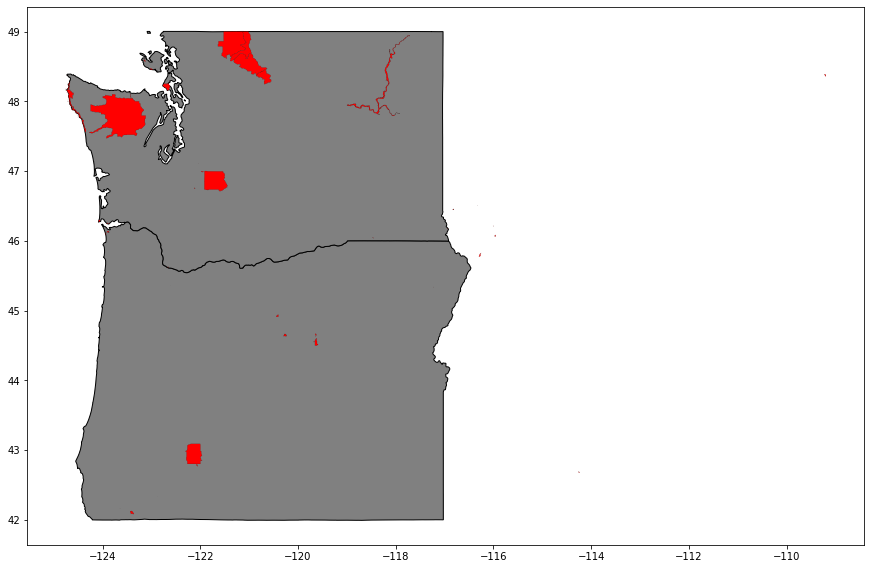

In [47]:
fig, ax = plt.subplots(figsize=(15,15))

pnw_states.plot(ax=ax, facecolor='grey', edgecolor='k')
wa_or_nps_gpd.plot(ax=ax, facecolor='r', edgecolor='k', linewidth=0.1)


That's looking like a better extent, let's check what parks that inlcudes

In [33]:
wa_or_nps_gpd.UNIT_NAME

2            Lake Chelan National Recreation Area
3          John Day Fossil Beds National Monument
4                 Minidoka National Historic Site
11                      Crater Lake National Park
12    Oregon Caves National Monument and Preserve
13                   North Cascades National Park
14             Ross Lake National Recreation Area
29                    Mount Rainier National Park
36          Fort Vancouver National Historic Site
43         Whitman Mission National Historic Site
55                          Olympic National Park
56       San Juan Island National Historical Park
58       Lewis and Clark National Historical Park
59             Nez Perce National Historical Park
60        Lake Roosevelt National Recreation Area
61     Ebey's Landing National Historical Reserve
Name: UNIT_NAME, dtype: object

Real quick grab the list of parks I have visitation data for  ...

['Crater Lake', 'John Day Fossil Beds National Monument', 'Klondike Gold Rush National Recreation Area', 'Lake Chelan National Recreation Area', 'Lake Roosevelt National Recreation Area', 'Lewis and Clark National Historic Place', 'Mount Rainer National Park', 'North Cascades National Park', 'Olympic National Park', 'Oregon Caves National Park and National Monument', 'Ross Lake National Recreation Area', 'San Juan Island National Historic Park']

Alright, I have all the boundaries (except for the `Klondike Gold Rush National Recreation Area` ... probably since it's in Alaska ... we shouldn't be looking at that anywho) for the parks I have data for, but also some more ... let's trim that down.

In [48]:
pnw_nps_select = wa_or_nps_gpd.loc[[11,3,2,60,58,29,13,55,12,14,56]]

<AxesSubplot:>

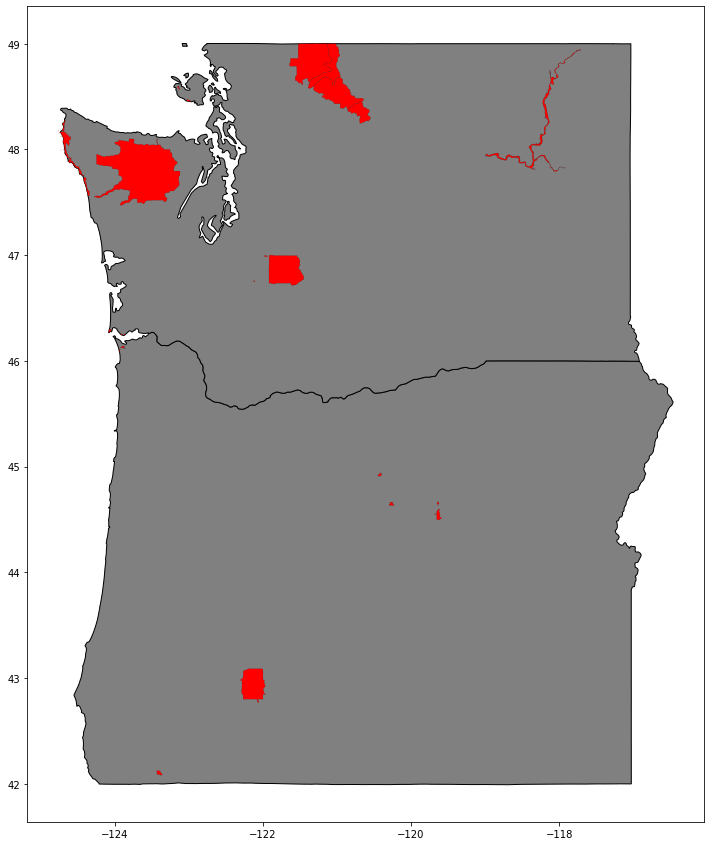

In [49]:
fig, ax = plt.subplots(figsize=(15,15))

pnw_states.plot(ax=ax, facecolor='grey', edgecolor='k')
pnw_nps_select.plot(ax=ax, facecolor='r', edgecolor='k', linewidth=0.1)

Alright, let's save that out.

In [50]:
path = '../data/pw_nps_select_geo.geojson'

try:
    os.remove(path)
except:
    pass

pnw_nps_select.to_file(path)